# Binary Town 


In [119]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
# import pycosat 


class Kid:
  def __init__(self, i: int, height: float, weight: float = 0) -> None:
    self.kid_name = i
    self.kid_height = height
    self.kid_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


class Adult:
  def __init__(self,i: int, height: int, weight: float = 0) -> None:
    self.adult_name = i
    self.adult_height = height
    self.adult_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

In [120]:


height_list_in_town = [4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8]
numHeights = len(height_list_in_town)
p_ht_given_kid = [0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]
p_ht_given_adult = [0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, 0.18, 0.18, 0.18]



In [121]:

p_height_given_kid_dictionary = dict()
for i in range(numHeights):
  # we can access the probability of height x, given kid
  p_height_given_kid_dictionary[height_list_in_town[i]] = p_ht_given_kid[i]

p_height_given_adult_dictionary = dict()
for i in range(numHeights):
  # we can access the probability of height x, given adult
  p_height_given_adult_dictionary[height_list_in_town[i]] = p_ht_given_adult[i]


# pKid is given to be 0.4
pKid = 0.4


(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

In [122]:


def simulate_people(n: int, height_list_in_town: list, p_ht_given_kid: list, p_ht_given_adult: int, pKid: float ):
  # returns kid list and adult list

  kid_list  = []
  adult_list = []
  people_name_height = []
  # list containing tuple of name and height
  for i in range(n):
    kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    # print(kid_or_adult)
    if kid_or_adult == 'kid':
      height_of_kid = rnd.choices(height_list_in_town, weights=p_ht_given_kid,k=1)[0]
      kid_list.append(Kid(i, height_of_kid))
      people_name_height.append((i,height_of_kid))
    else:
      height_of_adult = rnd.choices(height_list_in_town, weights=p_ht_given_adult,k=1)[0]
      adult_list.append(Adult(i, height_of_adult))
      people_name_height.append((i,height_of_adult))
  return kid_list, adult_list, people_name_height

# kid_objects, adult_objects = simulate_people(10000, height_list_in_town, p_ht_given_kid, p_ht_given_adult)
# the above is simulated for 10000 people

In [123]:

total_population = 1000

kid_objects, adult_objects, people_name_height_list = simulate_people(total_population, height_list_in_town, p_ht_given_kid, p_ht_given_adult,pKid)



In [124]:
# dictionary which represents who is kid and who is adult
people_type = dict()
for i in range(total_population):
  people_type[i] = ''
for kid in kid_objects:
  kid: Kid
  people_type[kid.kid_name] = 'kid'
for adult in adult_objects:
  adult: Adult
  people_type[adult.adult_name] = 'adult'


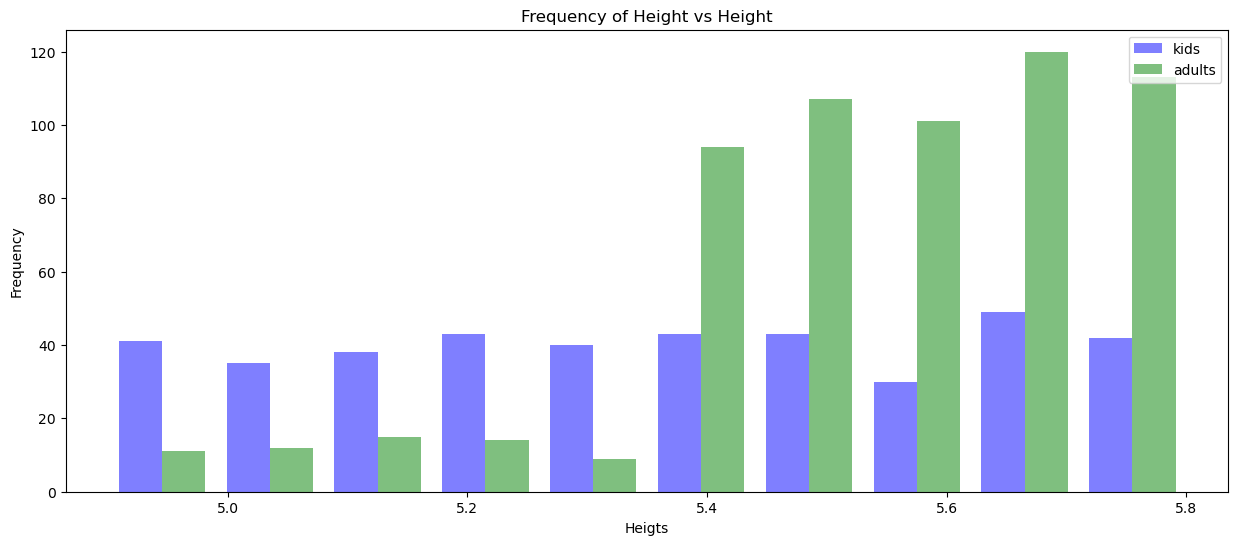

In [125]:

# 2a

kid_heights = [isinstance(kid,Kid) and kid.kid_height for kid in kid_objects]
adult_heights = [isinstance(adult, Adult) and adult.adult_height for adult in adult_objects]
plt.figure(figsize=(15,6))

# plt.hist(
#   kid_heights,
#   # bins=10,
#   label='kids',
#   alpha = 0.5,
#   # color='b'
# )
# plt.hist(
#   adult_heights,
#   # bins=10,
#   label='adults',
#   alpha = 0.5,
#   # color='g'
# )

plt.hist(
  [kid_heights, adult_heights],
  label=['kids','adults'],
  alpha=0.5,
  color=['blue','green']
)

plt.legend(loc='upper right')
plt.xlabel('Heigts')
plt.ylabel('Frequency')
plt.title('Frequency of Height vs Height')
plt.show()


In [126]:

height_sample = (kid_heights.copy()).extend(adult_heights.copy())
# sample of all heights


(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [127]:

# 2b
class Agent:
  def __init__(self, height_list_in_town: list, p_height_given_kid_dictionary: dict, p_height_given_adult_dictionary:dict, population: int ) -> None:
    self.possible_heights = height_list_in_town.copy()
    self.pHt_kid_dictionary = p_height_given_kid_dictionary.copy()
    self.pHt_adult_dictionary = p_height_given_adult_dictionary.copy()
    self.population_in_town = population

  def apply_bayes(self, sample: list, pKid: float, heights_in_town: list, pHtKid: list, pHtAdult: list):
    p_ht_kid_dictionary = dict()
    p_ht_adult_dictionary = dict()

    # sample is a list containing tuples as element
    # each tuple is of the form (person_name, height)
    for i in range(len(heights_in_town)):
      p_ht_kid_dictionary[heights_in_town[i]] = pHtKid[i]
      p_ht_adult_dictionary[heights_in_town[i]] = pHtAdult[i]
    

    
    # given a height we want to calculate the probability of whether the person is a kid 
    p_kid_height = dict()
    # the above dictionary stores the height X as 'key' and the probability whether the person is kid as 'value'
    p_adult_height = dict()
    setOfProb = []
    for height in heights_in_town:
      z = p_ht_kid_dictionary[height] * pKid
      y = p_ht_adult_dictionary[height] * (1-pKid)
      prob_kid_height = z/(z+y)
      # print(z/(z+y))
      p_kid_height[height] = prob_kid_height
      setOfProb.append(prob_kid_height)
      p_adult_height[height]  = 1 - prob_kid_height
    

    print(set(setOfProb))
    predictions = dict()
    for i in range(self.population_in_town):
      predictions[i] = ''
    # for sample_element in sample:
    #   # sample element is a tuple of the form (name, height)
    #   name, height_given = sample_element

      name, height_given = sample[i]

      # print(name)
      # print([p_kid_height[height_given], p_adult_height[height_given]])
      # if kid, will give true
      prediction_kid_adult = rnd.choices(
        [True,False],
        weights=[p_kid_height[height_given], p_adult_height[height_given]],
        k=1
      )[0]
      # print(prediction_kid_adult)
      # print(name, height_given)

      # now we will store the prediction
      predictions[i] = 'kid' if prediction_kid_adult else 'adult'
    
    # now we will return this predictions dictionary
    return predictions
    
  def apply_bayes_real(self, sample_list: list, function_h_k, function_h_a,  pKid: float,):
    # predictions is a dictionary which stores the prediction of each person in town
    # whether he is a kid or an adult

    # function_h_k and  function_h_a are functions 
    # function_h_a: function
    # function_h_k: function
    predictions = dict()
    for i in range(len(sample_list)):
      sample = sample_list[i]
      name, height = sample
      z = function_h_k(height)*pKid
      y = function_h_a(height)*(1-pKid)
      if not z and not y:
        print(function_h_k(height), function_h_a(height))
        print(function_h_k(5.15), function_h_a(5.35))
      P_kid_height = z/(z+y)
      prediction_kid_adult = rnd.choices(
        [True,False],
        weights=[P_kid_height, 1-P_kid_height],
        k=1
      )[0]
      predictions[name] = 'kid' if prediction_kid_adult else 'adult'


    return predictions

In [128]:

agent = Agent(height_list_in_town,p_height_given_kid_dictionary,p_height_given_adult_dictionary, total_population )
prediction_dictionary = agent.apply_bayes(people_name_height_list, pKid, height_list_in_town, p_ht_given_kid,p_ht_given_adult)


{0.7692307692307693, 0.2702702702702703}


In [129]:

# actual information is stored in the dictionary named 'people_type'
correct_prediction = 0
total_count = total_population


for i in range(total_population):
  if prediction_dictionary[i] == people_type[i]:
    correct_prediction += 1


print(f'the number of correct predictions is {correct_prediction}')
print(f'The accuracy of the agent is {correct_prediction/total_count}')




the number of correct predictions is 593
The accuracy of the agent is 0.593


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

In [130]:
def random01():
  return rnd.random()

The cumulative distribution function of $f_{h|k}(x)$ ie 

$F_{h|k}(x)$ is shown below

$F_{h|k}(x) =
\begin{cases}
  0 & \text{if } x \leq 4.5 \\
  x-4.5 & \text{if } 4.5 \lt x \leq 5 \\
  2x-9.5 & \text{if } 5 \lt x \leq 5.25 \\
  1 & \text{otherwise}
\end{cases}$

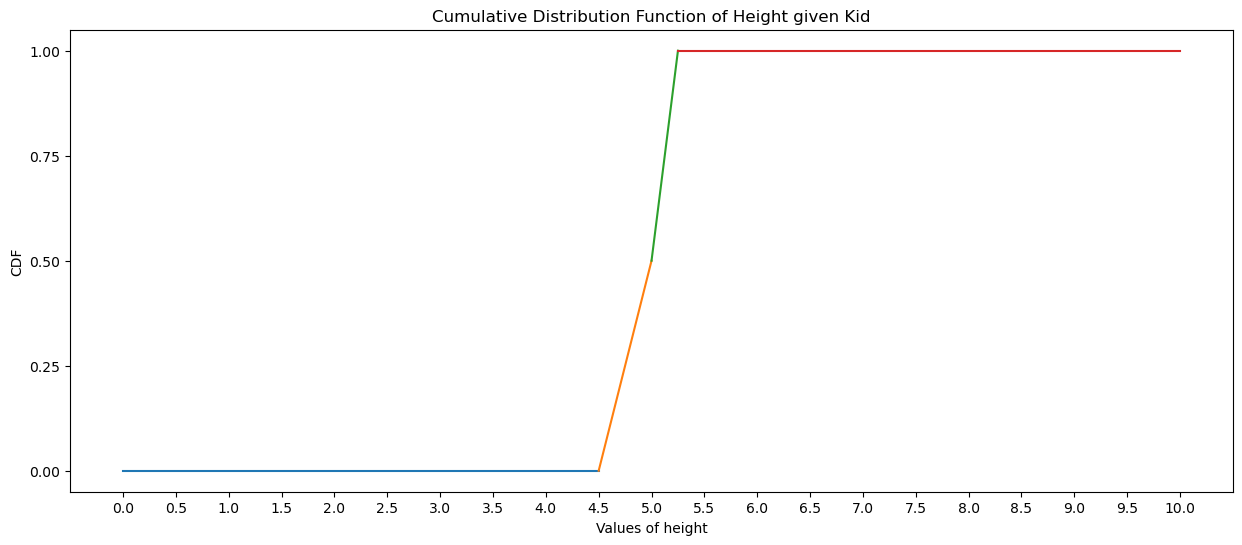

In [131]:
plt.figure(figsize=(15,6))
plt.plot(np.array([0,4.5]),np.array([0,0]))
plt.plot(np.array([4.5,5]),np.array([0,0.5]))
plt.plot(np.array([5,5.25]),np.array([0.5,1]))
plt.plot(np.array([5.25,10]),np.array([1,1]))
plt.xticks(np.arange(0,10.5,0.5))
plt.yticks(np.arange(0,1.25,0.25))
plt.xlabel('Values of height')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Height given Kid')
plt.show()

The cumulative distribution function of $f_{h|a}(x)$ ie 

$F_{h|a}(x)$ is shown below

$F_{h|a}(x) =
\begin{cases}
  0 & \text{if } x \leq 5 \\
  2x-10 & \text{if } 5 \lt x \leq 5.25 \\
  x-4.75 & \text{if } 5.25 \lt x \leq 5.75 \\
  1 & \text{otherwise}
\end{cases}$

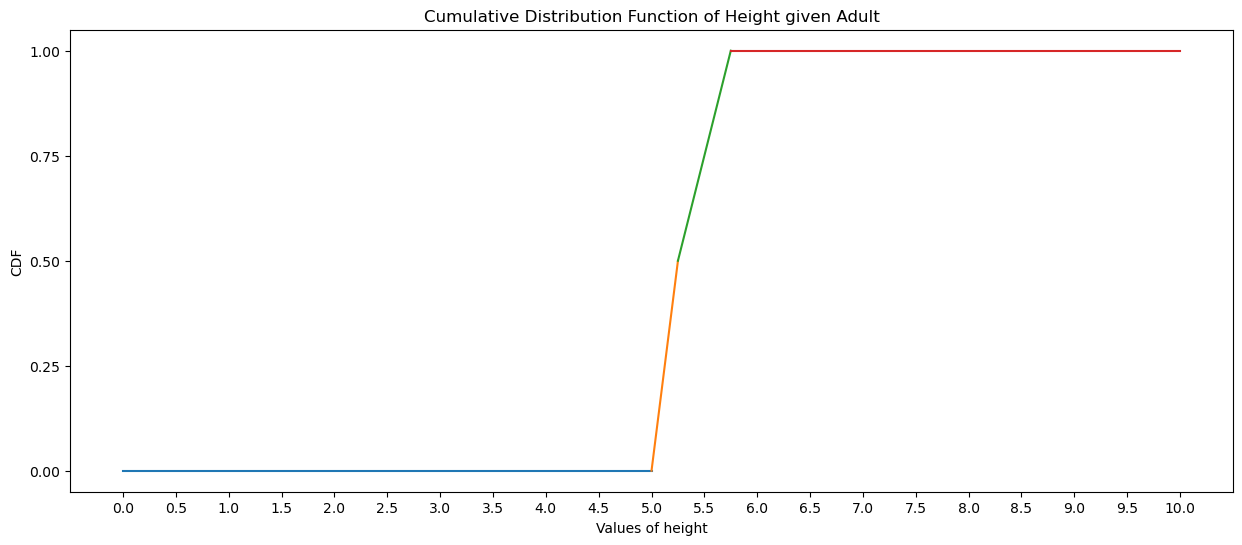

In [132]:
plt.figure(figsize=(15,6))
plt.plot(np.array([0,5]),np.array([0,0]))
plt.plot(np.array([5,5.25]),np.array([0,0.5]))
plt.plot(np.array([5.25,5.75]),np.array([0.5,1]))
plt.plot(np.array([5.75,10]),np.array([1,1]))
plt.xticks(np.arange(0,10.5,0.5))
plt.yticks(np.arange(0,1.25,0.25))
plt.xlabel('Values of height')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Height given Adult')

plt.show()

In [133]:
def simulate_people_real(n: int,pKid: float ):
  # returns kid list and adult list

  kid_list = []
  adult_list = []
  people_name_height = []
  # list containing tuple of name and height
  for i in range(n):
    kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    # print(kid_or_adult)
    random_number = random01()
    if kid_or_adult == 'kid':
      # we draw a line parallel to x-axis at y=random_number
      # we check where it intersects and the x-coordinate will be its height

      x = np.random.uniform(4.5,5)
      y = np.random.uniform(5,5.25)

      

      # if 0 <= random_number <=0.5:
      #   height_of_kid = random_number + 4.5
      #   kid_list.append(Kid(i,height_of_kid))
      #   people_name_height.append((i,height_of_kid))
      # else:
      #   height_of_kid = (random_number+9.5)/2
      #   kid_list.append(Kid(i, height_of_kid))
      #   people_name_height.append((i,height_of_kid))
      height_of_kid = rnd.choices([x,y], weights=[0.5,0.5],k=1)[0]
      kid_list.append(Kid(i, height_of_kid))
      people_name_height.append((i,height_of_kid))

    else:

      x = np.random.uniform(5,5.25)
      y = np.random.uniform(5.25,5.75)

      # if 0 <= random_number <=0.5:
      #   height_of_adult = (random_number + 10)/2
      #   adult_list.append(Adult(i,height_of_adult))
      #   people_name_height.append((i,height_of_adult))
      # else:
      #   height_of_adult = (random_number+4.75)
      #   adult_list.append(Adult(i, height_of_adult))
      #   people_name_height.append((i,height_of_adult))
      height_of_adult = rnd.choices([x,y], weights=[0.5,0.5],k=1)[0]
      adult_list.append(Adult(i, height_of_adult))
      people_name_height.append((i,height_of_adult))
  return kid_list, adult_list, people_name_height


In [134]:

total_population = 1000

kid_objects_real, adult_objects_real, people_name_height_list_real = simulate_people_real(total_population, pKid=0.4)


In [135]:
# for kid in kid_objects_real:
#   print(kid.kid_height, kid.kid_name)

In [136]:
# dictionary which represents who is kid and who is adult
people_type_real = dict()
for i in range(total_population):
  people_type_real[i] = ''
for kid in kid_objects_real:
  kid: Kid
  people_type_real[kid.kid_name] = 'kid'
for adult in adult_objects_real:
  adult: Adult
  people_type_real[adult.adult_name] = 'adult'


In [137]:
# for key, value in people_type_real.items():
#   print(key, value)

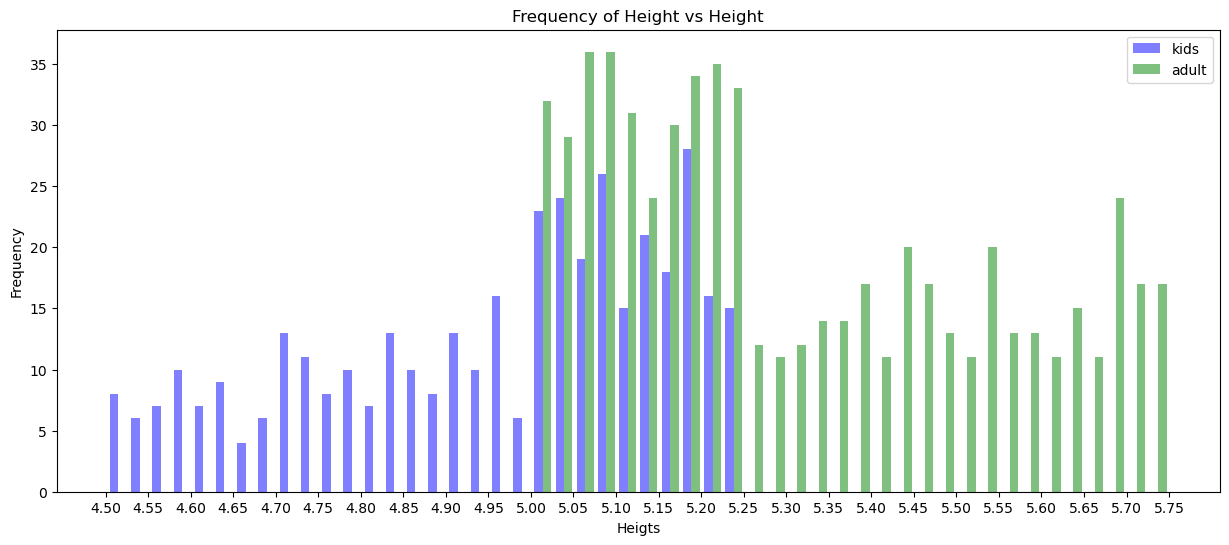

In [138]:

kid_heights = [isinstance(kid,Kid) and kid.kid_height for kid in kid_objects_real]
adult_heights = [isinstance(adult, Adult) and adult.adult_height for adult in adult_objects_real]


plt.figure(figsize=(15,6))
# plt.hist(
#   kid_heights,
#   bins=100,
#   label='kids',
#   alpha = 0.5,
#   # color='b'
# )
# plt.hist(
#   adult_heights,
#   bins=100,
#   label='adults',
#   alpha = 0.5,
#   # color='g'
# )

plt.hist(
  [kid_heights, adult_heights],
  label=['kids','adult'],
  alpha = 0.5,
  color=['blue','green'],
  bins=50
)

plt.xticks(np.arange(4.5,5.80,0.05))
plt.legend(loc='upper right')
plt.xlabel('Heigts')
plt.ylabel('Frequency')
plt.title('Frequency of Height vs Height')
plt.show()

In [139]:
def f_h_k(x: float):
  if 4.5<=x<=5:
    return 1
  elif 5<=x<=5.25:
    return 2
  else:
    return 0

In [140]:
def f_h_a(x: float):
  if 5<=x<=5.25:
    return 2
  elif 5.25<=x<=5.75:
    return 1
  else:
    return 0

In [141]:
# for z in people_name_height_list_real:
#   a = f_h_k(z[1])
#   b = f_h_a(z[1])
#   if (a,b)==(0,0):
#     print(a,b) 

In [142]:
# print(f_h_a(5.35))

In [143]:
agent_prediction_dictionary_real_heights = agent.apply_bayes_real(people_name_height_list_real,function_h_k=f_h_k,function_h_a=f_h_a, pKid=0.4)

In [144]:
correct_prediction_real_heights = 0

for name in agent_prediction_dictionary_real_heights.keys():
  if agent_prediction_dictionary_real_heights[name] == people_type_real[name]:
    correct_prediction_real_heights+=1


print(f'Agent\'s accuracy is {correct_prediction_real_heights/total_population}')



Agent's accuracy is 0.756


(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





In [145]:
# 2d


# 11
mu_height_given_kid = 2.5
sd_height_given_kid = 1
var_height_given_kid = sd_height_given_kid**2

height_given_kid_mu_sd_tuple = (mu_height_given_kid,sd_height_given_kid)

# 21
mu_height_given_adult = 5
sd_height_given_adult = 1
var_height_given_adult = sd_height_given_adult**2
height_given_adult_mu_sd_tuple = (mu_height_given_adult,sd_height_given_adult)

# 12
mu_weight_given_kid = 20
sd_weight_given_kid = 10
var_weight_given_kid = sd_weight_given_kid**2
weight_given_kid_mu_sd_tuple = (mu_weight_given_kid,sd_weight_given_kid)

# 22
mu_weight_given_adult = 40
sd_weight_given_adult = 10
var_weight_given_adult = sd_weight_given_adult**2
weight_given_adult_mu_sd_tuple = (mu_weight_given_adult,sd_weight_given_adult)

In [146]:
pKid = 0.4

In [147]:
def gaussian(mean:float , sd: float):
  return np.random.normal(loc=mean, scale=sd)

In [148]:
gaussian(5,10)

1.661043939496396

In [149]:
def simulate_people_gaussian(
    n: int, 
    height_given_kid_mu_sd_tuple: tuple,
    height_given_adult_mu_sd_tuple: tuple,
    weight_given_kid_mu_sd_tuple: tuple,
    weight_given_adult_mu_sd_tuple: tuple,
    pKid: float
  ):
  # 11
  mu_height_given_kid = height_given_kid_mu_sd_tuple[0]
  sd_height_given_kid = height_given_kid_mu_sd_tuple[1]
  # var_height_given_kid = sd_height_given_kid**2


  # 21
  mu_height_given_adult = height_given_adult_mu_sd_tuple[0]
  sd_height_given_adult = height_given_adult_mu_sd_tuple[1]
  # var_height_given_adult = sd_height_given_adult**2

  # 12
  mu_weight_given_kid = weight_given_kid_mu_sd_tuple[0]
  sd_weight_given_kid = weight_given_kid_mu_sd_tuple[1]
  # var_weight_given_kid = sd_weight_given_kid**2

  # 22
  mu_weight_given_adult = weight_given_adult_mu_sd_tuple[0]
  sd_weight_given_adult = weight_given_adult_mu_sd_tuple[1]
  # var_weight_given_adult = sd_weight_given_adult**2
  # returns kid list and adult list

  kid_list = []
  adult_list = []
  people_name_height_weight = []
  # tuple containing (name, height, weight)
  for i in range(n):
    kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    if kid_or_adult == 'kid':
      height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      while height_kid_positive < 0:
        height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)
      while weight_kid_positive < 0:
        weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)

      kid_list.append(Kid(i,height_kid_positive, weight_kid_positive))
      people_name_height_weight.append(
        (i,height_kid_positive,weight_kid_positive)
      )
    else:
      height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      while height_adult_positive < 0:
        height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)
      while weight_adult_positive < 0:
        weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)

      adult_list.append(Adult(i,height_adult_positive, weight_adult_positive))
      people_name_height_weight.append(
        (i,height_adult_positive,weight_adult_positive)
      )
    
  return kid_list, adult_list, people_name_height_weight



In [150]:
kid_objects_gaussian, adult_objects_gaussian, people_in_town_gaussian = simulate_people_gaussian(
  total_population,
  height_given_kid_mu_sd_tuple,
  height_given_adult_mu_sd_tuple ,
  weight_given_kid_mu_sd_tuple ,
  weight_given_adult_mu_sd_tuple,
  pKid=0.4
)


In [151]:
heights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_height for kid in kid_objects_gaussian
]
weights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_weight for kid in kid_objects_gaussian
]
heights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_height for adult in adult_objects_gaussian
]
weights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_weight for adult in adult_objects_gaussian
]



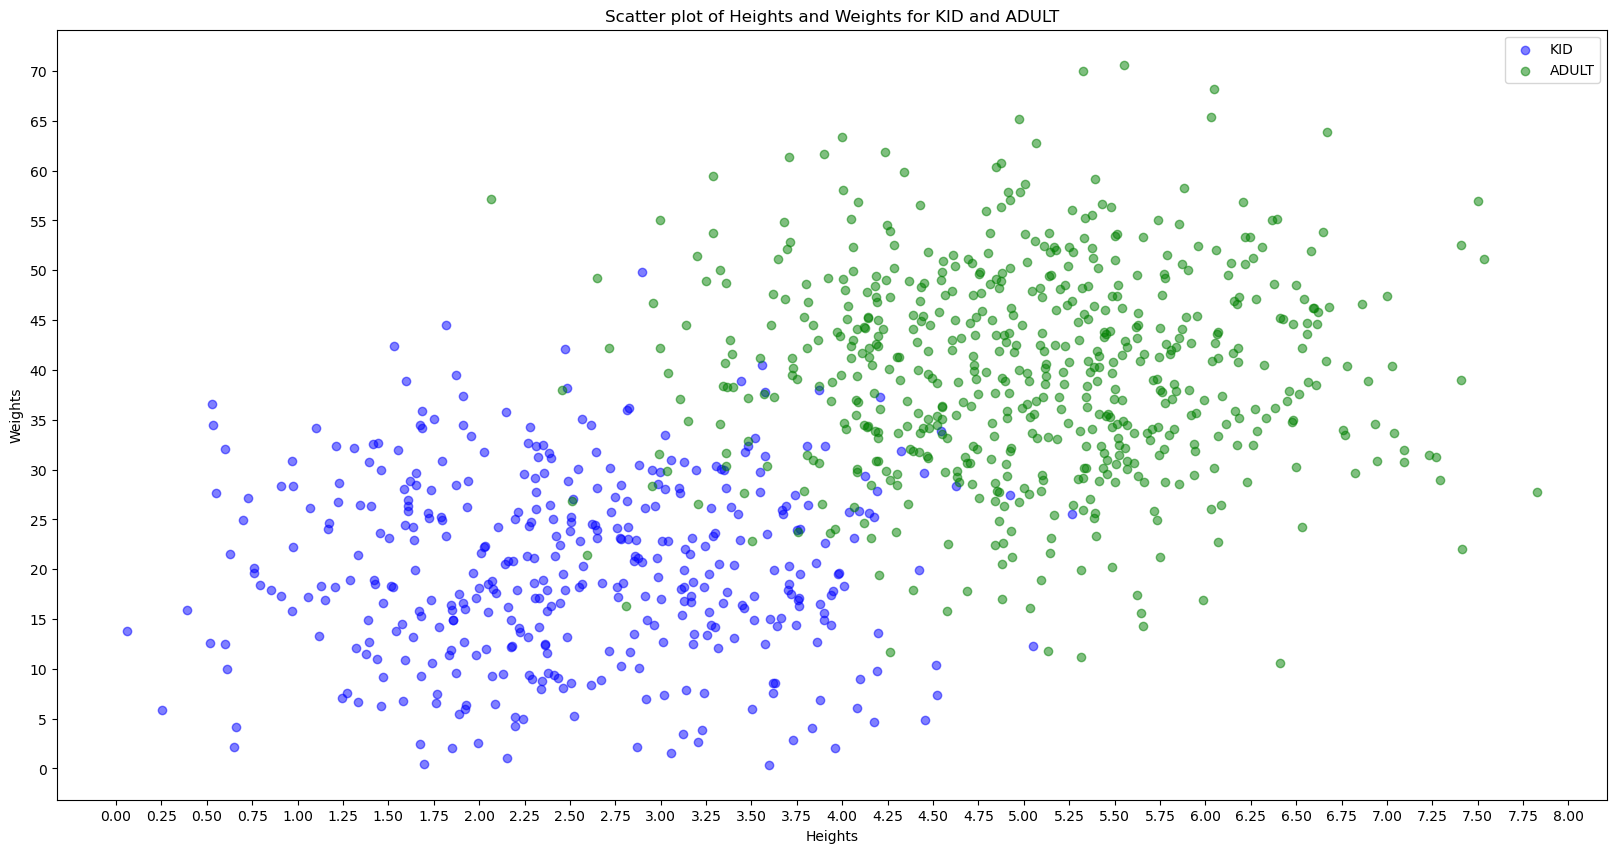

In [152]:
plt.figure(figsize=(20,10))

plt.scatter(heights_of_kid_gaussian, weights_of_kid_gaussian, color = 'blue', alpha=0.5, label = 'KID')

plt.scatter(heights_of_adult_gaussian, weights_of_adult_gaussian, color = 'green', alpha=0.5, label = 'ADULT')


plt.xlabel('Heights')
plt.ylabel('Weights')
plt.xticks(np.arange(0,8.25,0.25))
plt.yticks(np.arange(0,75,5))
plt.title('Scatter plot of Heights and Weights for KID and ADULT')
plt.legend(loc='upper right')
plt.show()


(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

In [153]:
# 2e

def distance(a: int, b: int, c: int, d: int):
  return np.sqrt((c-a)**2 + (d-b)**2)



In [154]:

def knn(k: int, height: float, weight: float, kid_objects_gaussian: list, adult_objects_gaussian: list):
  
  list_to_sort = []

  height_weight_kids = [
    isinstance(kid, Kid) and (kid.kid_height, kid.kid_weight, 'kid', kid) for kid in kid_objects_gaussian
  ]

  height_weight_adult = [
    isinstance(adult, Adult) and (adult.adult_height, adult.adult_weight, 'adult', adult) for adult in adult_objects_gaussian
  ]

  # the list 'list_to_sort' have elements of the form (height, weight, person_type)

  for element in height_weight_kids:
    list_to_sort.append((distance(height, weight, element[0], element[1]), element[2], element[3]))
  for element in height_weight_adult:
    list_to_sort.append((distance(height, weight, element[0], element[1]), element[2], element[3]))

  # print(list_to_sort)

  list_to_sort.sort()
  
  object_list_knn = []
  for i in range(len(list_to_sort)):
    object_list_knn.append(list_to_sort[i][2])

  k_nearest_objects = object_list_knn[0:k].copy()
  
  other_objects = object_list_knn[k:].copy()

  height_knn = []
  weight_knn = []

  for object_element in k_nearest_objects:
    if isinstance(object_element, Kid):
      height_knn.append(object_element.kid_height)
      weight_knn.append(object_element.kid_weight)
    elif isinstance(object_element, Adult):
      height_knn.append(object_element.adult_height)
      weight_knn.append(object_element.adult_weight)

  height_others = []
  weight_others = []

  for object_element in other_objects:
    if isinstance(object_element, Kid):
      height_others.append(object_element.kid_height)
      weight_others.append(object_element.kid_weight)
    elif isinstance(object_element, Adult):
      height_others.append(object_element.adult_height)
      weight_others.append(object_element.adult_weight)
  




  plt.figure(figsize=(20,10))

  plt.scatter(
    [height], [weight],
    color = 'blue',
    label = 'input'
  )
  plt.scatter(
    height_knn, weight_knn,
    color = 'green',
    label = f'{k} Nearest Neighbours'
  )

  plt.scatter(
    height_others, weight_others,
    color = 'yellow',
    label = 'Others'
  )
  plt.title('K nearest Neighbours')
  plt.legend(loc = 'upper right')
  plt.xlabel('Heights')
  plt.ylabel('Weights')
  # plt.xticks(np.arange(0,8.25,0.25))
  # plt.yticks(np.arange(0,75,5))
  # plt.xticks(np.arange(0,71,1))
  # plt.yticks(np.arange(0,9,1))
  plt.show()


  return list_to_sort[0:k]




#### The nearest neighbours may not seem like nearest neighbours because of the scale of the figure

#### For that, the scale of x axis and y axis should be the same

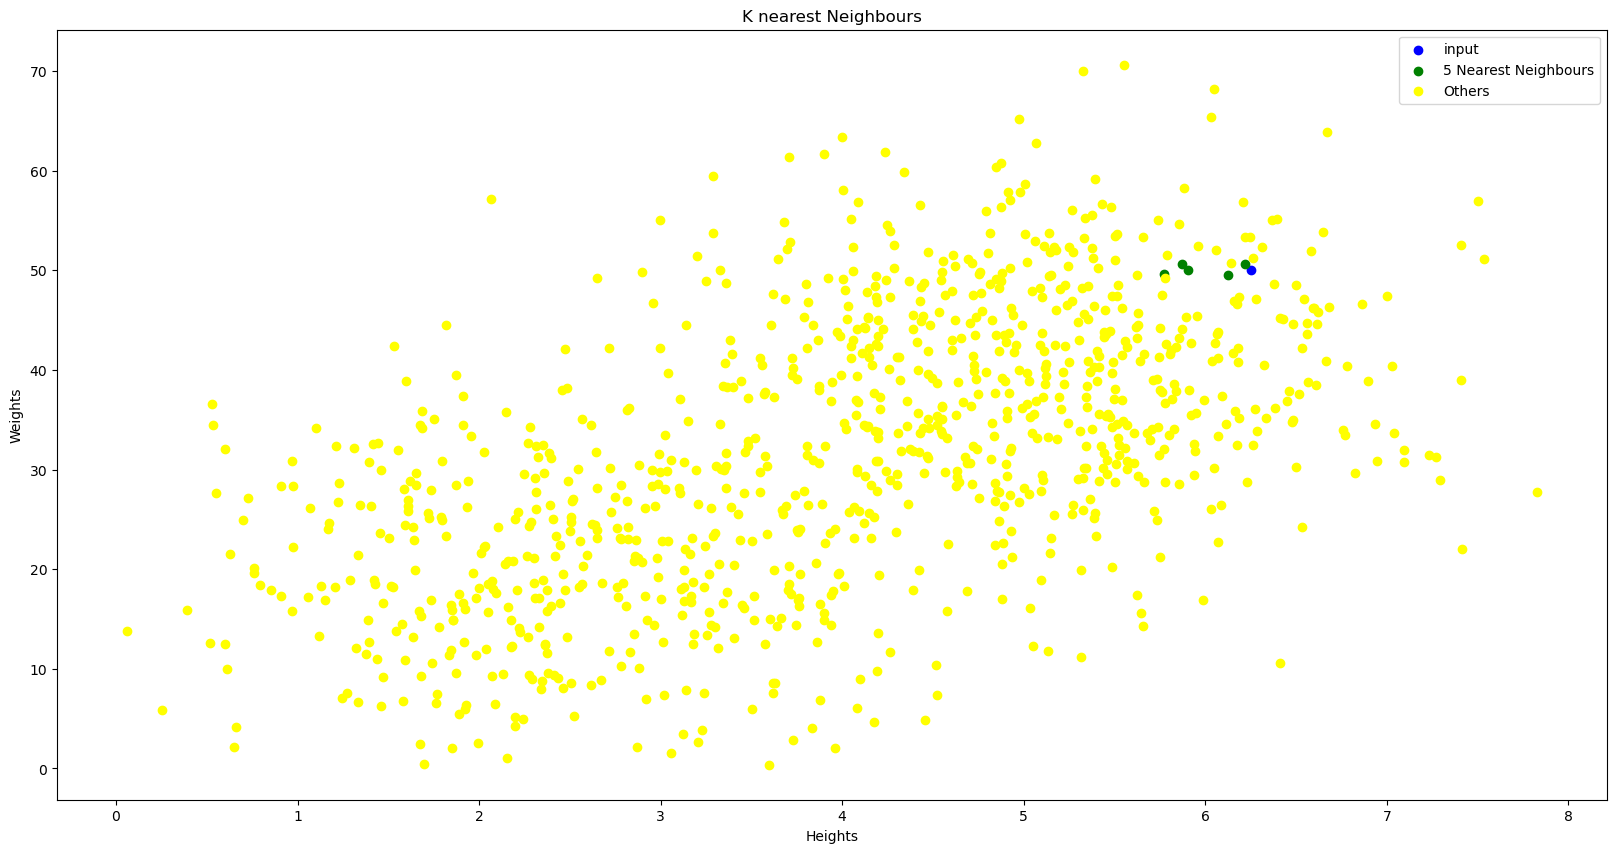

In [155]:
lst = knn(5, 6.25,50, kid_objects_gaussian, adult_objects_gaussian)

In [156]:

def majority_function(knn_list: list) -> str:
  # this function predicts if it is kid or adult

  count_kid = 0
  count_adult = 0
  for element in knn_list:
    if element[1] == 'kid':
      count_kid += 1
    else:
      count_adult += 1
  
  return 'kid' if count_kid > count_adult else 'adult'


In [157]:
majority_function(lst)

'adult'

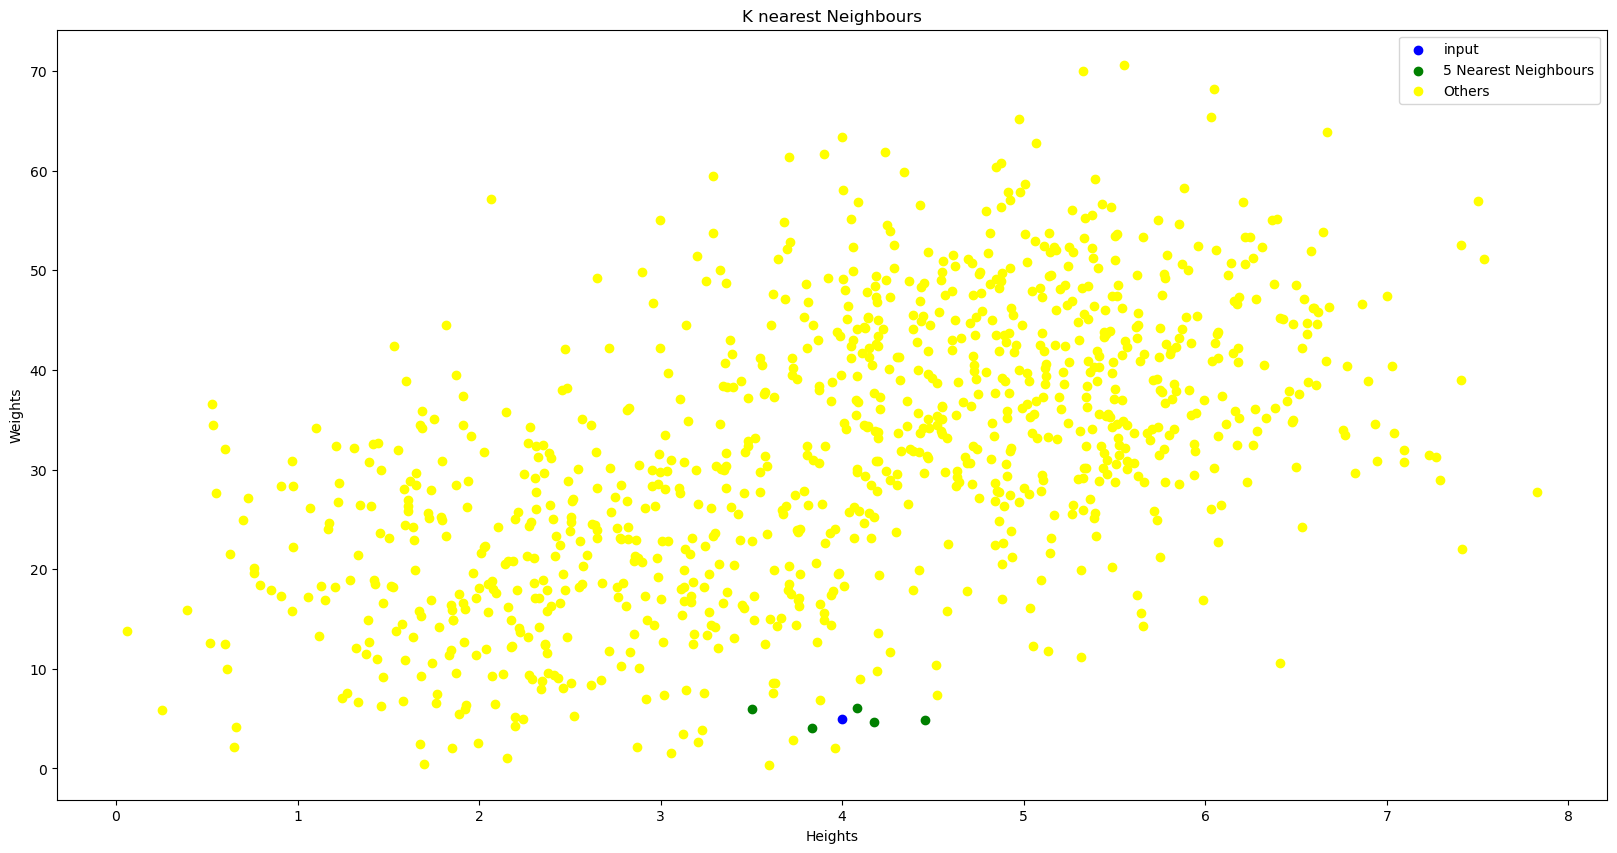

'kid'

In [158]:

def input_height_weight():
  return tuple(map(float, input().split()))

height, weight = input_height_weight()

majority_function(knn(5, height, weight, kid_objects_gaussian, adult_objects_gaussian))



